A Guide for the Procedure

The Kolmogorov-Smirnov Test Goodness of Fit Test is a non-parametric test that compares a given data with a known distribution and helps you determine if they have the same distribution. For example, the Kolmogorov-Smirnov (KS) test is considered for the following hypothesis:

Hypothesis 1:
H01i: 	The distribution of the observed data does not belong to a class of beta distribution functions.
H11i: 	The distribution of the observed data belong to a class of beta distribution functions.

A p-value, or probability value, is a number describing how likely it is that your data would have occurred by random chance (i.e., that the null hypothesis is true).
The level of statistical significance is often expressed as a p-value between 0 and 1.
The smaller the p-value, the less likely the results occurred by random chance, and the stronger the evidence that you should reject the null hypothesis.

The procedure is as follows:

1. Fit the Distribution to the Data:
First, the distribution (e.g., normal, log-normal, exponential) is fitted to the actual data to estimate the parameters of the distribution (e.g., mean and standard deviation for a normal distribution).


2. Calculate the KS Statistic for the Actual Data:
The KS statistic for the actual data is computed by performing the KS test between the actual data and the fitted distribution using the estimated parameters.


3. Generate Bootstrap Samples:
Multiple bootstrap samples (e.g., 1000 samples) are generated from the fitted distribution using the estimated parameters.
Each bootstrap sample has the same size as the original data.


4. Compute KS Statistics for Bootstrap Samples:
For each bootstrap sample, the KS statistic is computed by comparing the bootstrap sample to the fitted distribution.


5. Compare KS Statistics:
Count how many times the KS statistic from the bootstrap samples is greater than the KS statistic from the actual data.


6. Calculate the Bootstrap p-value:
The bootstrap p-value is calculated as the proportion of bootstrap samples where the KS statistic is greater than the KS statistic from the actual data.





Normal Distribution KS Test:
  Mean: 9.794, Standard Deviation: 0.485
  KS Statistic (Actual): 0.090, p-value: 0.743
  Mean KS Statistic (Bootstrap): 0.115
  Bootstrap p-value: 0.738


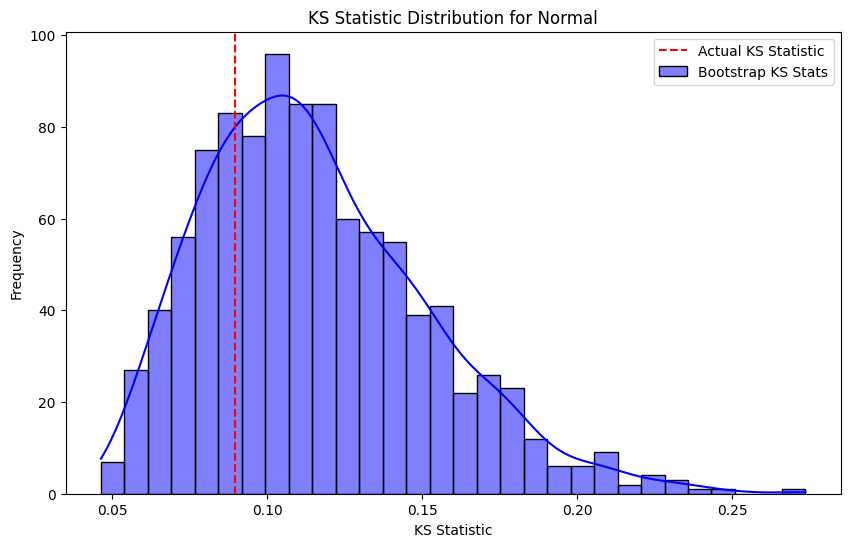


Log-Normal Distribution KS Test:
  Shape: 0.050, Location: 0.000, Scale: 9.781
  KS Statistic (Actual): 0.094, p-value: 0.686
  Mean KS Statistic (Bootstrap): 0.114
  Bootstrap p-value: 0.671


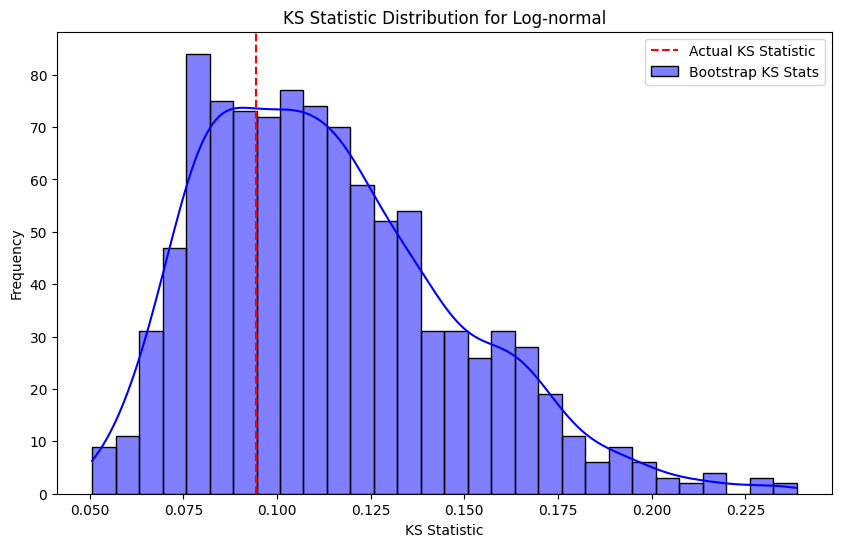


Exponential Distribution KS Test:
  Location: 8.799, Scale: 0.995
  KS Statistic (Actual): 0.225, p-value: 0.007
  Mean KS Statistic (Bootstrap): 0.115
  Bootstrap p-value: 0.005


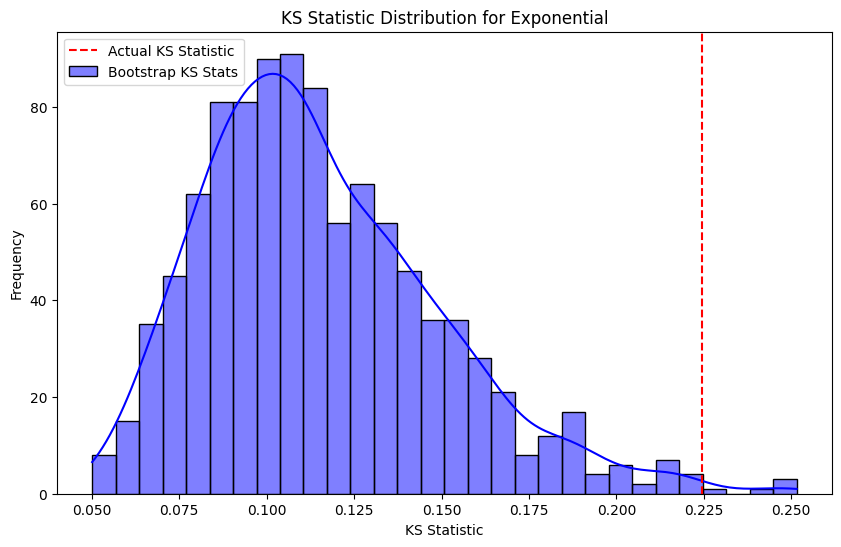

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# This is a function to fit data to a normal distribution and perform KS test
def fit_and_ks_test_normal(data_values):
    mean, std_dev = stats.norm.fit(data_values)
    ks_stat, ks_pvalue = stats.kstest(data_values, 'norm', args=(mean, std_dev))
    return mean, std_dev, ks_stat, ks_pvalue

# This is a function to fit data to a log-normal distribution and perform KS test
def fit_and_ks_test_lognormal(data_values):
    shape, loc, scale = stats.lognorm.fit(data_values, floc=0)
    ks_stat, ks_pvalue = stats.kstest(data_values, 'lognorm', args=(shape, loc, scale))
    return shape, loc, scale, ks_stat, ks_pvalue

# This is a function to fit data to an exponential distribution and perform KS test
def fit_and_ks_test_exponential(data_values):
    loc, scale = stats.expon.fit(data_values)
    ks_stat, ks_pvalue = stats.kstest(data_values, 'expon', args=(loc, scale))
    return loc, scale, ks_stat, ks_pvalue

# This is a function to perform bootstrap KS test
def bootstrap_ks_test(distribution, args, ks_stat_actual, n_samples=1000, sample_size=None):
    if sample_size is None:
        sample_size = len(data_values)

    if distribution == 'norm':
        samples = np.random.normal(args[0], args[1], (n_samples, sample_size))
    elif distribution == 'lognorm':
        log_mean = np.log(args[2])
        log_sigma = args[0]
        samples = np.random.lognormal(mean=log_mean, sigma=log_sigma, size=(n_samples, sample_size))
    elif distribution == 'expon':
        samples = np.random.exponential(args[1], (n_samples, sample_size)) + args[0]

    ks_stats = []
    for sample in samples:
        ks_stat_sample, _ = stats.kstest(sample, distribution, args=args)
        ks_stats.append(ks_stat_sample)

    p_value_final = np.mean(np.array(ks_stats) > ks_stat_actual)
    return ks_stats, p_value_final

# This is a function to plot KS statistics
def plot_ks_stats(ks_stats, ks_stat_actual, distribution_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(ks_stats, bins=30, kde=True, color='blue', label='Bootstrap KS Stats')
    plt.axvline(ks_stat_actual, color='red', linestyle='--', label='Actual KS Statistic')
    plt.title(f'KS Statistic Distribution for {distribution_name.capitalize()}')
    plt.xlabel('KS Statistic')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Input the actual data
file_path = 'data.csv'  # Replace with your actual file
data = pd.read_csv(file_path)
data_values = data.iloc[:, 0].dropna()

# KS statistic for the actual and bootstrap samples (Normal Distribution)
mean, std_dev, ks_stat_norm, ks_pvalue_norm = fit_and_ks_test_normal(data_values)
ks_stats_norm, p_value_final_norm = bootstrap_ks_test('norm', (mean, std_dev), ks_stat_norm)
print(f"Normal Distribution KS Test:")
print(f"  Mean: {mean:.3f}, Standard Deviation: {std_dev:.3f}")
print(f"  KS Statistic (Actual): {ks_stat_norm:.3f}, p-value: {ks_pvalue_norm:.3f}")
print(f"  Mean KS Statistic (Bootstrap): {np.mean(ks_stats_norm):.3f}")
print(f"  Bootstrap p-value: {p_value_final_norm:.3f}")
plot_ks_stats(ks_stats_norm, ks_stat_norm, "normal")

# KS statistic for the actual and bootstrap samples (Log-Normal Distribution)
shape, loc, scale, ks_stat_lognorm, ks_pvalue_lognorm = fit_and_ks_test_lognormal(data_values)
ks_stats_lognorm, p_value_final_lognorm = bootstrap_ks_test('lognorm', (shape, loc, scale), ks_stat_lognorm)
print(f"\nLog-Normal Distribution KS Test:")
print(f"  Shape: {shape:.3f}, Location: {loc:.3f}, Scale: {scale:.3f}")
print(f"  KS Statistic (Actual): {ks_stat_lognorm:.3f}, p-value: {ks_pvalue_lognorm:.3f}")
print(f"  Mean KS Statistic (Bootstrap): {np.mean(ks_stats_lognorm):.3f}")
print(f"  Bootstrap p-value: {p_value_final_lognorm:.3f}")
plot_ks_stats(ks_stats_lognorm, ks_stat_lognorm, "log-normal")

# KS statistic for the actual and bootstrap samples (Exponential Distribution)
loc, scale, ks_stat_expon, ks_pvalue_expon = fit_and_ks_test_exponential(data_values)
ks_stats_expon, p_value_final_expon = bootstrap_ks_test('expon', (loc, scale), ks_stat_expon)
print(f"\nExponential Distribution KS Test:")
print(f"  Location: {loc:.3f}, Scale: {scale:.3f}")
print(f"  KS Statistic (Actual): {ks_stat_expon:.3f}, p-value: {ks_pvalue_expon:.3f}")
print(f"  Mean KS Statistic (Bootstrap): {np.mean(ks_stats_expon):.3f}")
print(f"  Bootstrap p-value: {p_value_final_expon:.3f}")
plot_ks_stats(ks_stats_expon, ks_stat_expon, "exponential")
